# WHEN YOU HAVE PROJECT , NEEDS TO FOLLOW SOME STEP

1) Define the problems /questions

2) Data collection

3)Data cleaning like
 - handel the missing values (handle /delete)
 - handel the outlier
 - identify and remove the duplicates.
 -transform the data into suitable form

4)EDA (Exploratory data analysis)

5)Data visualization (use seaborn or other libraries)

6)Analyze the insight and report



In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
titanic=sns.load_dataset("titanic")  ## to load the data

In [ ]:
titanic.head()   ##.head() :- for checking the data as a sample

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()   ## info to check how many rows and column are available

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
#As we can check,some are miising values in the data ,so lets checkthe exact number.

In [ ]:
titanic.isnull().sum()  ## isnull().sum() :-- to check themissing values (exact number)

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


as we check ,
1) age-177 are missing values,should be imported basd on pclass or sex(because it is a numerical values replace with mean or median)

2) embarked town - 2 missing values can be filled with mode (because it is categorical values thats y we replace with mode)

3) deck-massive missing values (value in nun form,unavailble values in the dataset.better to drop this column.


In [ ]:
## age filled with median based on pclass or sex

1).Transform :-- gives the value in series form (gives the result in same shape as the original data.

2) .apply :- make a data frame.

3).fillna :- if value is missing then it will fill the value.

4). drop :- it will drop or delete the value permantly.





In [ ]:
titanic['age']=titanic.groupby(['pclass','sex'])['age'].transform(lambda x : x .fillna(x.median()))


1.   transform(lambda x: x.fillna(x.median())): For each group, it applies a function to fill in missing age values (NaNs). It fills these missing values with the median age of that specific group (same "pclass" and "sex").

The median is the middle value in a sorted list of numbers, so it's a good way to fill in missing data without being affected by extreme values (outliers).





In [ ]:
## Replace embark with mode :- mode:- most frequent values

In [ ]:
titanic['embarked'].mode()[0]  ## [0] is used to get the first value in that list, which is the most common value.


'S'

In [ ]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0],inplace=True)

<ipython-input-23-e7bc3fa579ac>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0],inplace=True)


In [ ]:
titanic["embarked"].isnull().sum()  ## for checking the missing values

0

In [ ]:
##deck: drop the column (delete)

In [ ]:
titanic.drop(columns=['deck'],inplace=True)

In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
##drop the unwanted column (delete)

In [ ]:
titanic.drop(columns=['alive','who','embark_town','adult_male'],inplace=True)

In [ ]:
titanic.isnull().sum()  ##to check all the missing values

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
alone,0


In [ ]:
# to check rows and column

In [ ]:
titanic.shape

(891, 10)

After dropping the unwanted column,there are 891 rows ,describe the passanger details and 10 column which shows the passanger features.

In [ ]:
titanic.describe(include='all')  # for statstical summary

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646,491,537
mean,0.383838,2.308642,NaN,29.112424,0.523008,0.381594,32.204208,NaN,NaN,NaN
std,0.486592,0.836071,NaN,13.304424,1.102743,0.806057,49.693429,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,21.500000,0.000000,0.000000,7.910400,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,26.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,36.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN


In [ ]:
#check the data and write the insight

-- servival rate only 38% ,remaining 98% did not survive.

-- most of passanger were in third class.

-- most of passanger were young (median=26 year) (using 98-95-99.7% rule ,29+13(1st std)+13(2nd std),+13(3rd std)= 68 years (max age) --but shows 80years old also

-- It must be outlier in age becaue it is showing 80 years old also

-- fare=we will take  50% = 15+50(1st std)+50(2nd std)+50(3rd std)=165 ,and max fare was 512 (so outlier) ----------------------------------------------------
median fair 14.45 but max was 512.33.it also may contain the outliers(empirial rule)

embarked-most of passanger from "S"

Alone:- most of passanger travel alone.

class:- most passanger class were in third.


In [ ]:
## to check duplicates with count

In [ ]:
titanic.duplicate().sum()  ## it is alredy delted thats y showing like this but this is actual code before deleting

AttributeError: 'DataFrame' object has no attribute 'duplicate'

In [ ]:
titanic.drop_duplicates(inplace=True)  ## deleting the duplicates

In [ ]:
titanic.duplicated().sum()   ## remove all the duplicate values.

0

In [ ]:
titanic.shape # to check rows and columns

(773, 10)

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,False
1,1,1,female,38.0,1,0,71.2833,C,First,False
2,1,3,female,26.0,0,0,7.9250,S,Third,True
3,1,1,female,35.0,1,0,53.1000,S,First,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True


# EDA (EXPLORATORY DATA ANALYSIS ) :- RAISE A QUES

Que 1) What is the overall distribution of passengers across different classes (Pclass)?

In [ ]:
titanic['pclass'].unique()  # it is a categorical form because there is a limit ,
                           #To check the numbers of data present in the column.


array([3, 1, 2])

In [ ]:
titanic['pclass'].value_counts()  #To check how many passanger count are there.

,count
pclass,
3,400
1,209
2,164


In [ ]:
titanic['pclass'].value_counts().sort_index() ## sort in ascending order.

,count
pclass,
1,209
2,164
3,400


In [ ]:
pclass_count=titanic['pclass'].value_counts().sort_index()


In [ ]:
pclass_count

,count
pclass,
1,209
2,164
3,400


In [ ]:
x=pclass_count.index  # to show the index

In [ ]:
x

Index([1, 2, 3], dtype='int64', name='pclass')

In [ ]:
y=pclass_count.values #to show the index values

In [ ]:
y

array([209, 164, 400])

In [ ]:
#Draw bar graph (category+numeric value)

<ipython-input-54-0ae335a8a1df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pclass_count,y=pclass_count,palette="bright")


Text(0.5, 1.0, 'distribution of passanger across different pclass')

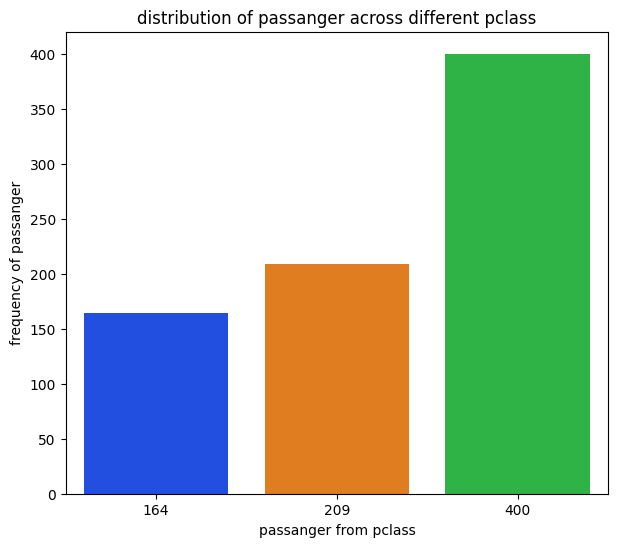

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(x=pclass_count,y=pclass_count,palette="bright")
plt.xlabel("passanger from pclass")
plt.ylabel("frequency of passanger")
plt.title("distribution of passanger across different pclass")

# INSIGHTS FROM THE PCLASS Distribution::

--Majority of the passanger travelled in pclass 3,indicating it was a most affordable and popular.

--pclass 1 had the least number of passanger,suggesting that fewer peaple could afford luxury travel.

-- pclass 2 had moderate no of passanger showing a middle class passanger presence on the titanic.

***QUE -- 2)  How is the age of passengers distributed?***

---





In [ ]:
# DRAW A HISTOGRAM PLOT ,WE WANT THE AGE DISTRIBUTION :---

Text(0.5, 1.0, 'age distribution of the passanger')

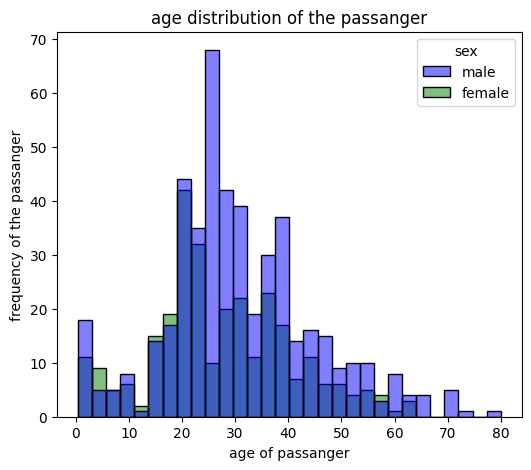

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(data=titanic,x="age",bins=30,hue='sex',palette=['blue',"green"])
plt.xlabel("age of passanger")
plt.ylabel("frequency of the passanger")
plt.title("age distribution of the passanger")

# INSIGHT FROM THE AGE DISTRIBUTION :

-- the peak age group is 20-30 year. indicating many young adults travelled.

-- there are fewer childrens(age<10)  and elderly (age>60) on board.

-- the age distribution has a long tail,on the right indicating some passanger were much older (may be outlier) not supposed to be board.

QUE 3 )** What is the distribution of passengers based on Sex?**

In [ ]:
titanic['sex'].unique()  # to check the data and categories

array(['male', 'female'], dtype=object)

In [ ]:
titanic['sex'].value_counts()  # how many passanger are available

,count
sex,
male,482
female,291


In [ ]:
gender_counts=titanic['sex'].value_counts()

In [ ]:
gender_counts

,count
sex,
male,482
female,291


In [ ]:
x=gender_counts.index  # show the index

In [ ]:
x

Index(['male', 'female'], dtype='object', name='sex')

In [ ]:
y=gender_counts.values #show the index values

In [ ]:
y

array([482, 291])

In [ ]:
#draw bar plot :---

<ipython-input-80-7f7abab4c8e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index,y=gender_counts.values,palette='hls')


Text(0.5, 1.0, 'distribution of passanger based on sex')

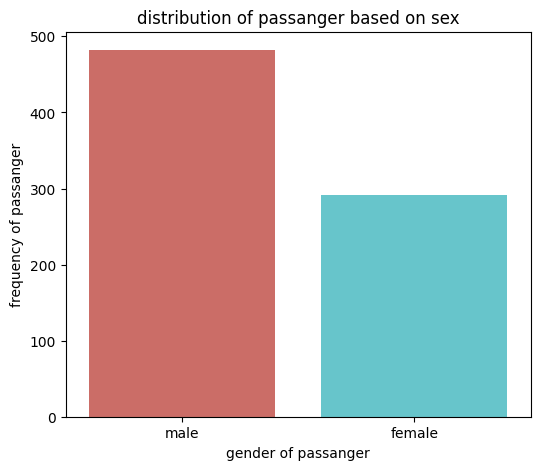

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x=gender_counts.index,y=gender_counts.values,palette='hls')
plt.xlabel("gender of passanger")
plt.ylabel('frequency of passanger')
plt.title('distribution of passanger based on sex')

## INSIGHT FROM THE GENDER DISTRIBUTION :--

-- dataset shows more male passanger travelled than female.

-- since the titanic was a mix emigrates,healthy workers,healthy passanger,men might have travelled more for work and opportunity.


**QUE 4) -How many passengers embarked from each port (Embarked)?**

In [ ]:
titanic['embarked'].unique()  # to check the unique values from the data

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
#s= Southampton , c= cherbourg ,Q = queenstown

In [ ]:
titanic['embarked'].value_counts() # how many values are present in the data

,count
embarked,
S,562
C,153
Q,58


In [ ]:
embarked_counts=titanic['embarked'].value_counts()

In [ ]:
embarked_counts

,count
embarked,
S,562
C,153
Q,58


In [ ]:
#drwa bar plot :---

<ipython-input-87-13349405c874>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=embarked_counts.index,y=embarked_counts.values,palette="Set2")


Text(0.5, 1.0, 'number of passanger embarked from each port')

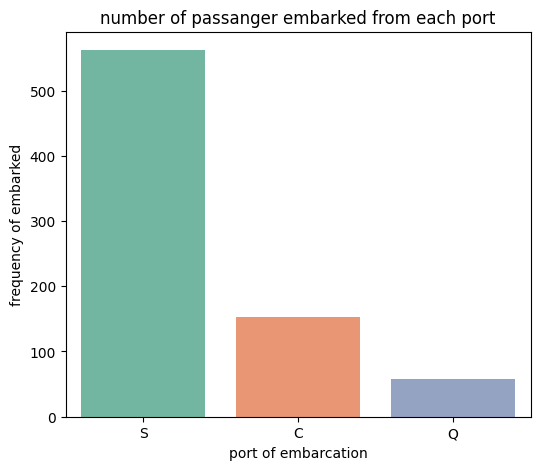

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x=embarked_counts.index,y=embarked_counts.values,palette="Set2")
plt.xlabel("port of embarcation")
plt.ylabel("frequency of embarked")
plt.title("number of passanger embarked from each port")

# INSIGHT FROM THE EMBARKED :---

-- majority of passanger embarked from s-southampton

-- moderate passanger embarked from c- cherburg.

Q -queenstown had least number of passanger.

**# QUE 5) What is the survival rate overall, and how does it vary by Pclass?**

In [ ]:
## MIX QUE :-- rate jab bhi aata hai,us time mean nikalna hai.

In [ ]:
overall_survival_rate=titanic['survived'].mean()*100  # when you want in percentage always mulply with 100

In [ ]:
overall_survival_rate

41.52652005174644

In [ ]:
survival_by_pclass=titanic.groupby(['pclass'])['survived'].mean()*100

In [97]:
survival_by_pclass

,survived
pclass,
1,64.114833
2,50.609756
3,26.000000


In [98]:
## DRAW BAR PLOT :---

<ipython-input-102-a45a6f283f7b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_pclass.index,y=survival_by_pclass.values,palette="Set1")


Text(0.5, 1.0, 'survival rate by pclass')

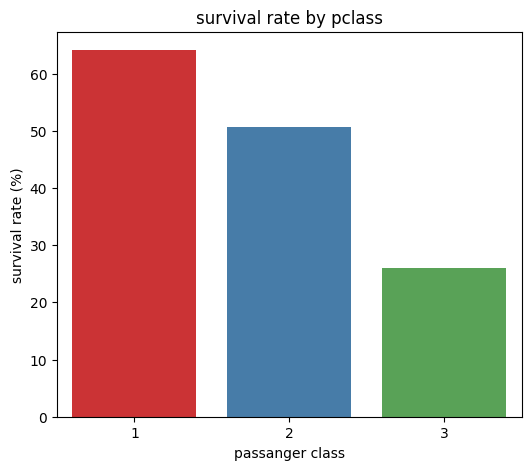

In [102]:
plt.figure(figsize=(6,5))
sns.barplot(x=survival_by_pclass.index,y=survival_by_pclass.values,palette="Set1")
plt.xlabel('passanger class')
plt.ylabel("survival rate (%)")
plt.title("survival rate by pclass")

## INSIGHT ON SURVIVAL RATE BY PCLASS :    

-- Only 41% of passanger survived ,indicating a high fatility rate.

-- 1st class had highest survival rate ~64% passanger had better access to lifeboats and safety.

--moderate survival rate in 2nd class ~50% some middle clas passanegr survived but not as many as pclass 1.

-- lowest survival rate in 3rd class ~26% passanger due to fewer safety resorces.